# ANALYSE DES JEUX VIDEO (NOTES ET SUGGESTIONS JOUEURS)

### Importation, nettoyage et traitements préliminaires

In [1]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd, numpy as np

In [2]:
#On importe les données dans un dataframe
df_vgames = pd.read_excel("All_publish_VideoGame_2022.xlsx")

In [3]:
df_vgames.head()

,id,slug,name,metacritic,released,Annee,tba,rating,rating_top,playtime,...,Apple II,NES,Dreamcast,PlayStation 5,Xbox Series S/X,Commodore / Amiga,Atari 26,Atari ST,Atari 78,SEGA Saturn
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,2015,False,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,2016,False,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100,land-sliders,Land Sliders,NaN,2015-09-24,2015,False,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,2016,False,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,2016,False,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440896 entries, 0 to 440895
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    440896 non-null  int64         
 1   slug                  440880 non-null  object        
 2   name                  440885 non-null  object        
 3   metacritic            4627 non-null    float64       
 4   released              440896 non-null  datetime64[ns]
 5   Annee                 440896 non-null  int64         
 6   tba                   440896 non-null  bool          
 7   rating                440833 non-null  float64       
 8   rating_top            440833 non-null  float64       
 9   playtime              440833 non-null  float64       
 10  achievements_count    440833 non-null  float64       
 11  ratings_count         440833 non-null  float64       
 12  suggestions_count     440833 non-null  float64       
 13 

In [5]:
# Supprimer les lignes où la colonne 'rating' contient des valeurs null
df_vgames = df_vgames.dropna(subset=['rating'])

df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440833 entries, 0 to 440895
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    440833 non-null  int64         
 1   slug                  440817 non-null  object        
 2   name                  440822 non-null  object        
 3   metacritic            4621 non-null    float64       
 4   released              440833 non-null  datetime64[ns]
 5   Annee                 440833 non-null  int64         
 6   tba                   440833 non-null  bool          
 7   rating                440833 non-null  float64       
 8   rating_top            440833 non-null  float64       
 9   playtime              440833 non-null  float64       
 10  achievements_count    440833 non-null  float64       
 11  ratings_count         440833 non-null  float64       
 12  suggestions_count     440833 non-null  float64       
 13  game

In [6]:
# Supprimer les lignes où la colonne 'slug' contient des valeurs null
df_vgames = df_vgames.dropna(subset=['slug'])

df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440817 entries, 0 to 440895
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    440817 non-null  int64         
 1   slug                  440817 non-null  object        
 2   name                  440808 non-null  object        
 3   metacritic            4621 non-null    float64       
 4   released              440817 non-null  datetime64[ns]
 5   Annee                 440817 non-null  int64         
 6   tba                   440817 non-null  bool          
 7   rating                440817 non-null  float64       
 8   rating_top            440817 non-null  float64       
 9   playtime              440817 non-null  float64       
 10  achievements_count    440817 non-null  float64       
 11  ratings_count         440817 non-null  float64       
 12  suggestions_count     440817 non-null  float64       
 13  game

In [7]:
# Supprimer les lignes où la colonne 'name' contient des valeurs null
df_vgames = df_vgames.dropna(subset=['name'])

df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440808 entries, 0 to 440895
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    440808 non-null  int64         
 1   slug                  440808 non-null  object        
 2   name                  440808 non-null  object        
 3   metacritic            4621 non-null    float64       
 4   released              440808 non-null  datetime64[ns]
 5   Annee                 440808 non-null  int64         
 6   tba                   440808 non-null  bool          
 7   rating                440808 non-null  float64       
 8   rating_top            440808 non-null  float64       
 9   playtime              440808 non-null  float64       
 10  achievements_count    440808 non-null  float64       
 11  ratings_count         440808 non-null  float64       
 12  suggestions_count     440808 non-null  float64       
 13  game

In [8]:
# Créer un DataFrame avec les lignes où la colonne 'platforms' contient des valeurs nulles
df_platforms_null = df_vgames[df_vgames['platforms'].isnull()]

# Afficher les premières lignes du nouveau DataFrame
df_platforms_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3360 entries, 108 to 440829
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3360 non-null   int64         
 1   slug                  3360 non-null   object        
 2   name                  3360 non-null   object        
 3   metacritic            1 non-null      float64       
 4   released              3360 non-null   datetime64[ns]
 5   Annee                 3360 non-null   int64         
 6   tba                   3360 non-null   bool          
 7   rating                3360 non-null   float64       
 8   rating_top            3360 non-null   float64       
 9   playtime              3360 non-null   float64       
 10  achievements_count    3360 non-null   float64       
 11  ratings_count         3360 non-null   float64       
 12  suggestions_count     3360 non-null   float64       
 13  game_series_count  

In [9]:
# Supprimer les lignes où la colonne 'platforms' contient des valeurs null
df_vgames = df_vgames.dropna(subset=['platforms'])

df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437448 entries, 0 to 440895
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    437448 non-null  int64         
 1   slug                  437448 non-null  object        
 2   name                  437448 non-null  object        
 3   metacritic            4620 non-null    float64       
 4   released              437448 non-null  datetime64[ns]
 5   Annee                 437448 non-null  int64         
 6   tba                   437448 non-null  bool          
 7   rating                437448 non-null  float64       
 8   rating_top            437448 non-null  float64       
 9   playtime              437448 non-null  float64       
 10  achievements_count    437448 non-null  float64       
 11  ratings_count         437448 non-null  float64       
 12  suggestions_count     437448 non-null  float64       
 13  game

In [10]:
# Réinitialiser l'index du DataFrame filtré
df_vgames.reset_index(drop=True, inplace=True)

In [11]:
# changer les valeurs manquantes par 0 dans certaines colonnes
df_vgames.iloc[:, [19,20,21,22,23,24,26,27,28,29,30,31,32,33]] = df_vgames.iloc[:, [19,20,21,22,23,24,26,27,28,29,30,31,32,33]].fillna(0).astype(int)
df_vgames.iloc[:, [34,35,36,37,38,39,40,41,42,43,44,45,46,47]] = df_vgames.iloc[:, [34,35,36,37,38,39,40,41,42,43,44,45,46,47]].fillna(0).astype(int)
df_vgames.iloc[:, [48,49,50,51,52,53,54,55,56,57,58,59,60]] = df_vgames.iloc[:, [48,49,50,51,52,53,54,55,56,57,58,59,60]].fillna(0).astype(int)
df_vgames.iloc[:, [61,62,63,64,65,66]] = df_vgames.iloc[:, [61,62,63,64,65,66]].fillna(0).astype(int)

In [12]:
# Convertir les colonnes de float en int
df_vgames['playtime'] = df_vgames['playtime'].astype(int)
df_vgames['achievements_count'] = df_vgames['achievements_count'].astype(int)
df_vgames['ratings_count'] = df_vgames['ratings_count'].astype(int)
df_vgames['suggestions_count'] = df_vgames['suggestions_count'].astype(int)
df_vgames['game_series_count'] = df_vgames['game_series_count'].astype(int)
df_vgames['reviews_count'] = df_vgames['reviews_count'].astype(int)

# Convertir les colonnes par numéro d'index
df_vgames.iloc[:, [19,20,21,22,23,24,26,27,28,29,30,31,32,33]] = df_vgames.iloc[:, [19,20,21,22,23,24,26,27,28,29,30,31,32,33]].astype(int)
df_vgames.iloc[:, [34,35,36,37,38,39,40,41,42,43,44,45,46,47]] = df_vgames.iloc[:, [34,35,36,37,38,39,40,41,42,43,44,45,46,47]].astype(int)
df_vgames.iloc[:, [48,49,50,51,52,53,54,55,56,57,58,59,60]] = df_vgames.iloc[:, [48,49,50,51,52,53,54,55,56,57,58,59,60]].astype(int)
df_vgames.iloc[:, [61,62,63,64,65,66]] = df_vgames.iloc[:, [61,62,63,64,65,66]].astype(int)

In [13]:
# regarder les valeurs uniques 
print(df_vgames['tba'].unique())
print('_'*25)
print(df_vgames['rating'].unique())
print('_'*25)
print(df_vgames['rating_top'].unique())
print('_'*25)
print(df_vgames['playtime'].unique())
print('_'*25)
print(df_vgames['achievements_count'].unique())
print('_'*25)
print(df_vgames['ratings_count'].unique())
print('_'*25)
print(df_vgames['suggestions_count'].unique())
print('_'*25)
print(df_vgames['game_series_count'].unique())
print('_'*25)
print(df_vgames['reviews_count'].unique())
print('_'*25)
print(df_vgames['esrb_rating'].unique())
print('_'*25)

[False]
_________________________
[0.   3.07 3.74 3.25 3.12 2.78 2.48 2.54 3.76 2.2  3.03 3.54 3.65 3.24
 3.33 3.92 4.26 4.07 4.25 3.67 3.87 2.86 3.64 4.12 2.69 3.85 3.8  4.21
 4.15 2.   4.06 4.39 3.23 3.71 4.05 3.4  2.12 2.4  3.82 2.44 4.41 3.77
 3.62 2.42 2.55 3.59 2.76 2.83 4.18 3.06 2.6  3.   3.42 3.7  3.16 3.36
 3.94 3.79 2.59 3.61 3.44 3.09 3.39 3.6  2.88 4.34 3.34 3.84 3.43 3.86
 3.17 2.97 3.41 2.04 2.64 4.22 2.91 3.21 3.5  3.11 2.79 3.73 3.05 3.14
 4.13 2.45 2.33 1.67 2.07 3.53 1.75 3.95 2.72 4.14 3.13 2.5  4.04 3.31
 3.3  4.08 2.23 3.83 2.92 4.16 3.58 3.75 2.57 2.66 4.   3.27 2.89 2.31
 2.84 3.22 3.02 3.28 4.2  1.8  3.35 4.29 2.63 2.13 3.89 4.37 2.82 1.9
 3.68 2.58 2.81 3.78 2.9  2.25 1.56 3.52 3.48 2.43 2.17 2.53 3.66 2.46
 2.11 2.93 4.28 4.43 4.33 2.22 2.96 2.67 3.81 1.95 2.14 3.37 1.42 3.26
 2.74 2.62 2.75 1.79 1.64 3.91 1.77 4.27 1.71 2.8  1.29 2.41 3.18 3.56
 3.9  2.77 3.63 2.98 2.38 3.38 3.99 3.46 3.29 3.1  3.88 1.93 3.55 4.35
 1.5  2.95 3.49 1.86 2.29 2.94 3.45 2.71 1.9

In [14]:
df_vgames.describe()

,id,metacritic,released,Annee,rating,rating_top,playtime,achievements_count,ratings_count,suggestions_count,...,Apple II,NES,Dreamcast,PlayStation 5,Xbox Series S/X,Commodore / Amiga,Atari 26,Atari ST,Atari 78,SEGA Saturn
count,437448.000000,4620.000000,437448,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000,...,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000,437448.000000
mean,272160.569809,73.000649,2017-12-15 01:03:36.470071296,2017.437366,0.078785,0.090292,0.212885,4.663359,2.151865,86.085596,...,0.000011,0.000105,0.000418,0.000105,0.000098,0.000043,0.000016,0.000014,0.000005,0.000007
min,1.000000,15.000000,2000-01-01 00:00:00,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137951.750000,67.000000,2016-12-10 00:00:00,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275950.500000,75.000000,2018-09-14 00:00:00,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,412293.250000,81.000000,2020-02-09 00:00:00,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,525548.000000,97.000000,2020-12-31 00:00:00,2020.000000,4.860000,5.000000,1600.000000,12322.000000,4289.000000,1427.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,154525.748741,11.408996,NaN,3.076073,0.518936,0.582585,4.937483,120.712417,37.640279,111.615592,...,0.003381,0.010254,0.020449,0.010254,0.009914,0.006590,0.004000,0.003703,0.002138,0.002619


In [15]:
print(f"Nombre de lignes avec 'rating' = 0 : {(df_vgames['rating'] == 0).sum()}")
print('_'*25)
print(f"Nombre de lignes avec 'rating_top' = 0 : {(df_vgames['rating_top'] == 0).sum()}")
print('_'*25)
print(f"Nombre de lignes avec 'ratings_count' = 0 : {(df_vgames['ratings_count'] == 0).sum()}")
print('_'*25)
print(f"Nombre de lignes avec 'suggestions_count' = 0 : {(df_vgames['suggestions_count'] == 0).sum()}")
print('_'*25)
print(f"Nombre de lignes avec 'reviews_count' = 0 : {(df_vgames['reviews_count'] == 0).sum()}")

Nombre de lignes avec 'rating' = 0 : 427102
_________________________
Nombre de lignes avec 'rating_top' = 0 : 426066
_________________________
Nombre de lignes avec 'ratings_count' = 0 : 407265
_________________________
Nombre de lignes avec 'suggestions_count' = 0 : 31287
_________________________
Nombre de lignes avec 'reviews_count' = 0 : 406667


In [16]:
df_vgames = df_vgames.drop(columns=['tba', 'metacritic','released','achievements_count'])

In [17]:
df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437448 entries, 0 to 437447
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    437448 non-null  int64  
 1   slug                  437448 non-null  object 
 2   name                  437448 non-null  object 
 3   Annee                 437448 non-null  int64  
 4   rating                437448 non-null  float64
 5   rating_top            437448 non-null  float64
 6   playtime              437448 non-null  int32  
 7   ratings_count         437448 non-null  int32  
 8   suggestions_count     437448 non-null  int32  
 9   game_series_count     437448 non-null  int32  
 10  reviews_count         437448 non-null  int32  
 11  developers            432953 non-null  object 
 12  genres                339696 non-null  object 
 13  publishers            121951 non-null  object 
 14  esrb_rating           52775 non-null   object 
 15  

### Traitements et analyses des genres de jeux video

In [18]:
#remplacer les valeurs null de genres par autres 
df_vgames['genres'] = df_vgames['genres'].fillna('autres')

In [19]:
df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437448 entries, 0 to 437447
Data columns (total 63 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    437448 non-null  int64  
 1   slug                  437448 non-null  object 
 2   name                  437448 non-null  object 
 3   Annee                 437448 non-null  int64  
 4   rating                437448 non-null  float64
 5   rating_top            437448 non-null  float64
 6   playtime              437448 non-null  int32  
 7   ratings_count         437448 non-null  int32  
 8   suggestions_count     437448 non-null  int32  
 9   game_series_count     437448 non-null  int32  
 10  reviews_count         437448 non-null  int32  
 11  developers            432953 non-null  object 
 12  genres                437448 non-null  object 
 13  publishers            121951 non-null  object 
 14  esrb_rating           52775 non-null   object 
 15  

In [20]:
# Utiliser un échappement correct pour compter uniquement '||' comme séparateur
max_separators = df_vgames['genres'].str.count('\|\|').max()

# Filtrer les lignes où le nombre de '||' est égal à cette valeur maximale
max_genres_rows = df_vgames[df_vgames['genres'].str.count('\|\|') == max_separators]

# Afficher la ou les lignes avec le maximum de séparateurs pour une vérification visuelle
print(f"Nombre maximum de genres trouvés : {max_separators + 1}")
print(max_genres_rows[['genres']])

Nombre maximum de genres trouvés : 19
                                                   genres
419105  Action||Shooter||Adventure||RPG||Strategy||Sim...


In [21]:
# Étape 1 : Séparer les genres en plusieurs colonnes
genres_split = df_vgames['genres'].str.split('\|\|', expand=True)

# Étape 2 : Renommer les colonnes générées dynamiquement
genres_split.columns = [f'genres{i+1}' for i in range(genres_split.shape[1])]

# Étape 3 : Concaténer le dataframe original avec les nouvelles colonnes
df_vgames = pd.concat([df_vgames, genres_split], axis=1)

# Afficher les premières lignes pour vérifier
df_vgames.head()

,id,slug,name,Annee,rating,rating_top,playtime,ratings_count,suggestions_count,game_series_count,...,genres10,genres11,genres12,genres13,genres14,genres15,genres16,genres17,genres18,genres19
0,1,dgeneration-hd,D/Generation HD,2015,0.0,0.0,1,2,292,0,...,None,None,None,None,None,None,None,None,None,None
1,10,g-prime,G Prime Into The Rain,2016,0.0,0.0,0,3,389,0,...,None,None,None,None,None,None,None,None,None,None
2,100,land-sliders,Land Sliders,2015,0.0,0.0,0,2,83,0,...,None,None,None,None,None,None,None,None,None,None
3,1000,pixel-gear,Pixel Gear,2016,0.0,0.0,0,0,455,0,...,None,None,None,None,None,None,None,None,None,None
4,10000,gods-and-idols,Gods and Idols,2016,0.0,1.0,1,5,262,0,...,None,None,None,None,None,None,None,None,None,None


In [22]:
df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437448 entries, 0 to 437447
Data columns (total 82 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    437448 non-null  int64  
 1   slug                  437448 non-null  object 
 2   name                  437448 non-null  object 
 3   Annee                 437448 non-null  int64  
 4   rating                437448 non-null  float64
 5   rating_top            437448 non-null  float64
 6   playtime              437448 non-null  int32  
 7   ratings_count         437448 non-null  int32  
 8   suggestions_count     437448 non-null  int32  
 9   game_series_count     437448 non-null  int32  
 10  reviews_count         437448 non-null  int32  
 11  developers            432953 non-null  object 
 12  genres                437448 non-null  object 
 13  publishers            121951 non-null  object 
 14  esrb_rating           52775 non-null   object 
 15  

In [23]:
df_vgames = df_vgames.drop(columns=['genres'])

In [24]:
# Créer une liste des colonnes de genres que tu veux analyser
genres_columns = [col for col in df_vgames.columns if col.startswith('genres')]

# Initialiser une série vide pour stocker les comptes des genres
total_genres_count = pd.Series(dtype=int)

# Compter les occurrences dans chaque colonne de genres et les additionner
for col in genres_columns:
    total_genres_count = total_genres_count.add(df_vgames[col].value_counts(), fill_value=0)

# Convertir en entier (pour éviter les valeurs décimales après l'addition)
total_genres_count = total_genres_count.astype(int)

# Trier les genres par ordre décroissant
total_genres_count = total_genres_count.sort_values(ascending=False)

# Afficher le total des occurrences de chaque genre, trié par ordre décroissant
print(total_genres_count)

autres                   97752
Action                   93423
Adventure                66454
Puzzle                   53176
Platformer               47261
Simulation               37431
Shooter                  30562
Strategy                 29562
RPG                      28306
Indie                    26925
Casual                   24570
Arcade                   19344
Racing                   14836
Sports                   13880
Board Games               6761
Educational               6394
Fighting                  5782
Family                    5185
Card                      3217
Massively Multiplayer     1680
dtype: int32


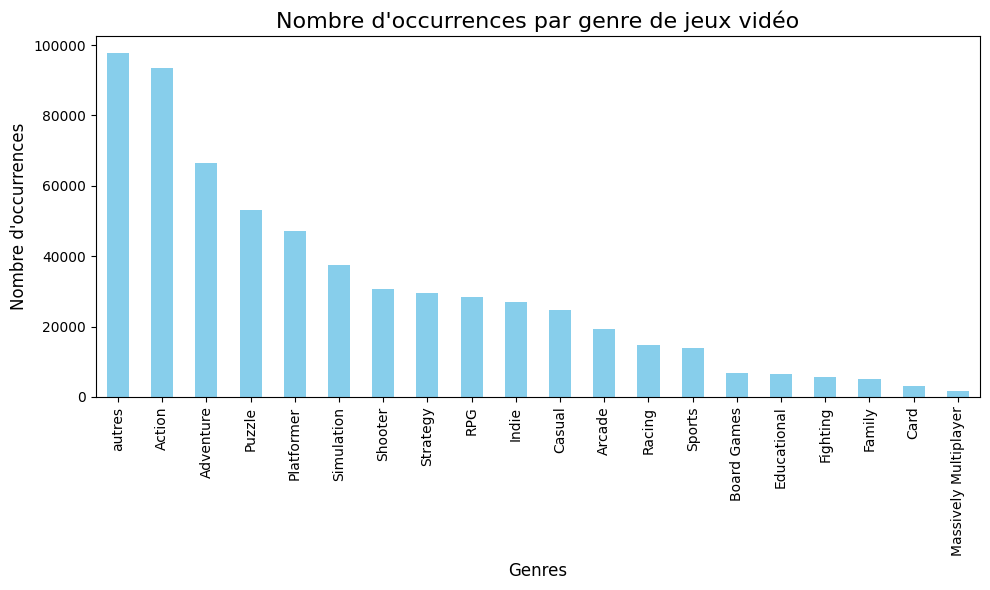

In [25]:
import matplotlib.pyplot as plt

# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Créer l'histogramme en utilisant les genres et leurs occurrences
total_genres_count.plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Nombre d\'occurrences par genre de jeux vidéo', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)

# Rotation des étiquettes de genres pour mieux les lire
plt.xticks(rotation=90)

# Afficher le graphique
plt.tight_layout()
plt.show()

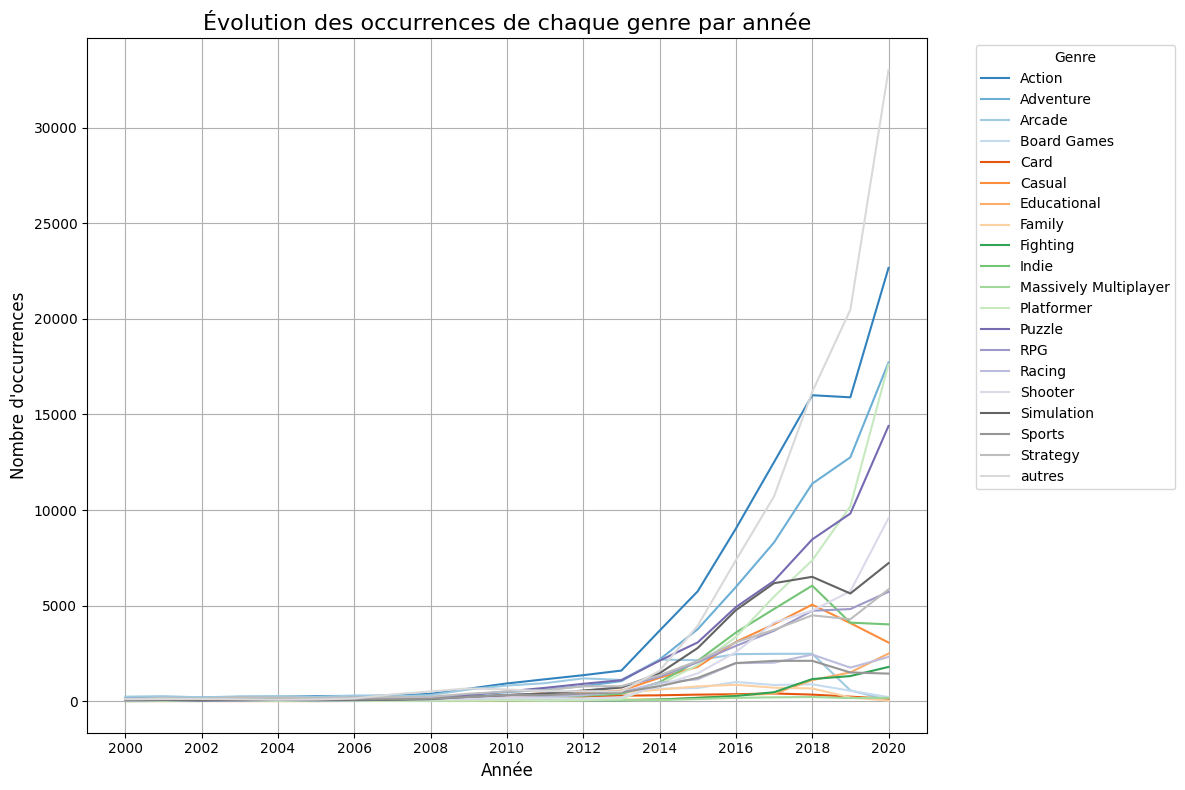

In [26]:
# Étape 1 : Concaténer toutes les colonnes 'genres1', 'genres2', etc., avec 'annee'
df_genres_concat = pd.melt(df_vgames, id_vars=['Annee'], value_vars=['genres1', 'genres2', 'genres3', 'genres4', 'genres5', 
                                                                     'genres6', 'genres7', 'genres8', 'genres9', 'genres10',
                                                                    'genres11', 'genres12', 'genres13', 'genres14', 'genres15', 
                                                                     'genres16', 'genres17', 'genres18', 'genres19'],
                           var_name='genre_col', value_name='genre')

# Retirer les valeurs nulles (celles qui n'ont pas de genre pour une colonne donnée)
df_genres_concat = df_genres_concat.dropna(subset=['genre'])

# Étape 2 : Groupby sur 'annee' et 'genre' pour compter les occurrences
occurrences_par_genre = df_genres_concat.groupby(['Annee', 'genre']).size().unstack(fill_value=0)

# Étape 3 : Tracer le graphique en courbe
plt.figure(figsize=(12, 8))

# Couleurs pour les genres (tab20c fournit une large gamme de couleurs)
colors = plt.cm.tab20c.colors

# Tracer chaque genre avec une courbe différente
for i, genre in enumerate(occurrences_par_genre.columns):
    plt.plot(occurrences_par_genre.index, occurrences_par_genre[genre], label=genre, color=colors[i % len(colors)])

# Ajouter les labels et la légende
plt.title("Évolution des occurrences de chaque genre par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Ajuster les ticks pour l'axe des années (X) afin d'afficher uniquement les valeurs entières
plt.xticks(ticks=np.arange(occurrences_par_genre.index.min(), occurrences_par_genre.index.max()+1, 2))

# Afficher le graphique
plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()

In [27]:
df_genres_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 612501 entries, 0 to 8293169
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Annee      612501 non-null  int64 
 1   genre_col  612501 non-null  object
 2   genre      612501 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.7+ MB


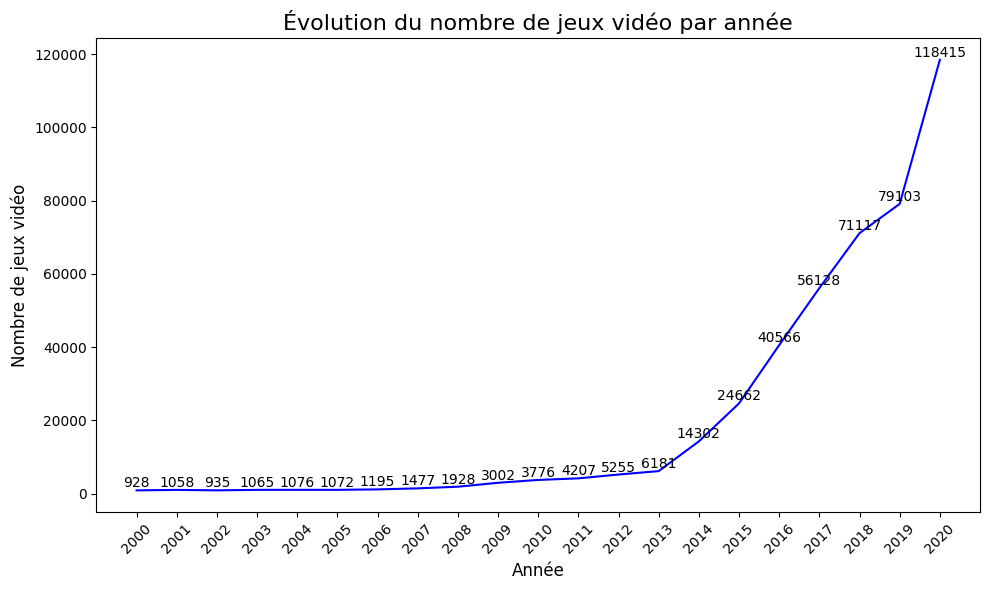

In [28]:
# Étape 1 : Grouper les jeux par année et compter le nombre de jeux par an
jeux_par_annee = df_vgames.groupby('Annee').size()

# Étape 2 : Tracer le graphique en courbes
plt.figure(figsize=(10, 6))

# Tracer la courbe sans points
plt.plot(jeux_par_annee.index, jeux_par_annee.values, linestyle='-', color='b')

# Ajouter les valeurs (nombre de jeux vidéo) sur chaque année
for x, y in zip(jeux_par_annee.index, jeux_par_annee.values):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')

# Ajouter les labels et le titre
plt.title("Évolution du nombre de jeux vidéo par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de jeux vidéo", fontsize=12)

# Afficher les années en entiers sur l'axe X
plt.xticks(ticks=np.arange(jeux_par_annee.index.min(), jeux_par_annee.index.max() + 1, 1), rotation=45)



# Afficher le graphique
plt.tight_layout()
plt.show()

### Notes moyenne des joueurs par genre de jeu

In [29]:
# Étape 1 : Créer une série avec tous les genres et inclure ratings_count
genres_melted = df_vgames.melt(id_vars=['rating', 'ratings_count'], 
                               value_vars=[f'genres{i}' for i in range(1, 20)], 
                               value_name='genre').dropna()

# Étape 2 : Exclure les genres vides et les lignes où ratings_count == 0
genres_melted = genres_melted[(genres_melted['genre'] != '') & (genres_melted['ratings_count'] > 0)]

# Étape 3 : Calculer la moyenne des notes par genre en tenant compte uniquement des lignes valides
moyenne_notes_par_genre = genres_melted.groupby('genre')['rating'].mean()

# Trier les genres par la note moyenne
moyenne_notes_par_genre = moyenne_notes_par_genre.sort_values(ascending=False)

# Afficher les moyennes des notes par genre
print(moyenne_notes_par_genre)

genre
Shooter                  1.986341
Fighting                 1.873862
Platformer               1.739216
Action                   1.441629
Family                   1.332190
Adventure                1.258924
Strategy                 1.253661
Card                     1.222637
Sports                   1.212983
Puzzle                   1.200597
RPG                      1.175829
Racing                   1.164390
Arcade                   1.163289
Indie                    1.107612
Simulation               1.033382
Massively Multiplayer    1.016170
Board Games              0.995919
Educational              0.862783
Casual                   0.813244
autres                   0.622073
Name: rating, dtype: float64


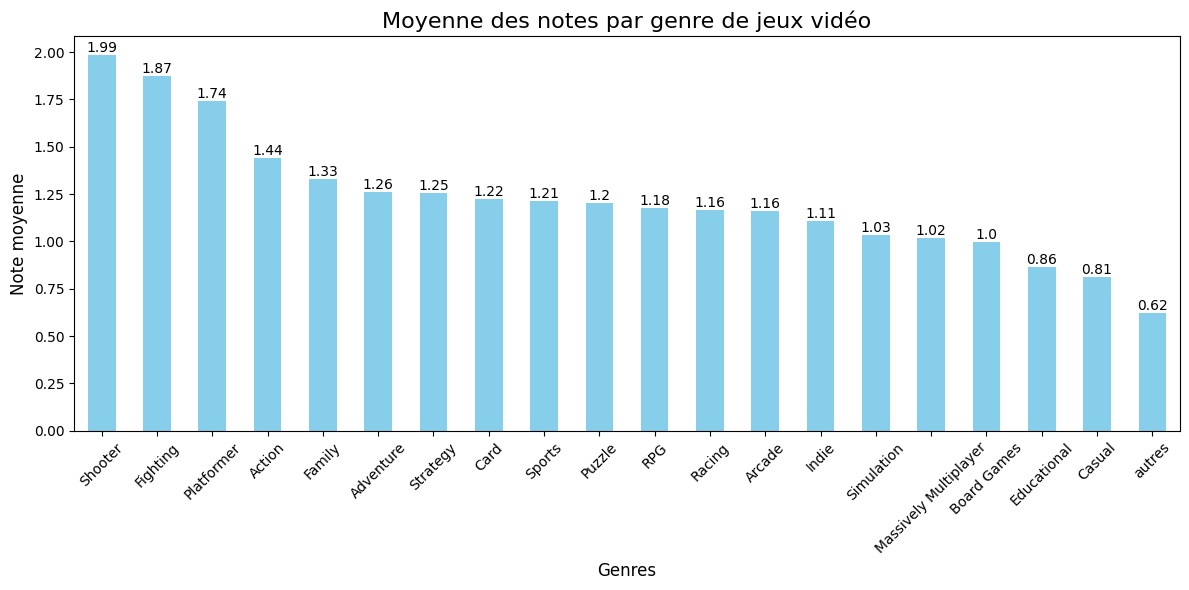

In [30]:
plt.figure(figsize=(12, 6))
moyenne_notes_par_genre.plot(kind='bar', color='skyblue')

# Ajouter les labels et le titre
plt.title("Moyenne des notes par genre de jeux vidéo", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Note moyenne", fontsize=12)

# Afficher les valeurs sur les barres
for index, value in enumerate(moyenne_notes_par_genre):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

# Ajuster la disposition
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

### Analyses sur les jeux sortie en 2013 et plus (date de sorti des console actuellement en ventes les vieilles)

In [31]:
# Filtrer les lignes où la colonne 'Annee' est supérieure ou égale à 2013
df_vgames_2013 = df_vgames[df_vgames['Annee'] >= 2013]

# Afficher les premières lignes du nouveau DataFrame pour vérification
df_vgames_2013.head()

,id,slug,name,Annee,rating,rating_top,playtime,ratings_count,suggestions_count,game_series_count,...,genres10,genres11,genres12,genres13,genres14,genres15,genres16,genres17,genres18,genres19
0,1,dgeneration-hd,D/Generation HD,2015,0.0,0.0,1,2,292,0,...,None,None,None,None,None,None,None,None,None,None
1,10,g-prime,G Prime Into The Rain,2016,0.0,0.0,0,3,389,0,...,None,None,None,None,None,None,None,None,None,None
2,100,land-sliders,Land Sliders,2015,0.0,0.0,0,2,83,0,...,None,None,None,None,None,None,None,None,None,None
3,1000,pixel-gear,Pixel Gear,2016,0.0,0.0,0,0,455,0,...,None,None,None,None,None,None,None,None,None,None
4,10000,gods-and-idols,Gods and Idols,2016,0.0,1.0,1,5,262,0,...,None,None,None,None,None,None,None,None,None,None


In [32]:
df_vgames_2013.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410474 entries, 0 to 437447
Data columns (total 81 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    410474 non-null  int64  
 1   slug                  410474 non-null  object 
 2   name                  410474 non-null  object 
 3   Annee                 410474 non-null  int64  
 4   rating                410474 non-null  float64
 5   rating_top            410474 non-null  float64
 6   playtime              410474 non-null  int32  
 7   ratings_count         410474 non-null  int32  
 8   suggestions_count     410474 non-null  int32  
 9   game_series_count     410474 non-null  int32  
 10  reviews_count         410474 non-null  int32  
 11  developers            408547 non-null  object 
 12  publishers            96941 non-null   object 
 13  esrb_rating           44398 non-null   object 
 14  added_status_yet      410474 non-null  float64
 15  added

In [33]:
#suppression des colonnes genres12 à 19 car vides
df_vgames_2013 = df_vgames_2013.drop(columns=['genres12', 'genres13','genres14','genres15','genres16','genres17','genres18','genres19'])

In [34]:
# Créer une liste des colonnes de genres que tu veux analyser
genres_columns_2013 = [col for col in df_vgames_2013.columns if col.startswith('genres')]

# Initialiser une série vide pour stocker les comptes des genres
total_genres_count_2013 = pd.Series(dtype=int)

# Compter les occurrences dans chaque colonne de genres et les additionner
for col in genres_columns_2013:
    total_genres_count_2013 = total_genres_count_2013.add(df_vgames_2013[col].value_counts(), fill_value=0)

# Convertir en entier (pour éviter les valeurs décimales après l'addition)
total_genres_count_2013 = total_genres_count_2013.astype(int)

# Trier les genres par ordre décroissant
total_genres_count_2013 = total_genres_count_2013.sort_values(ascending=False)

# Afficher le total des occurrences de chaque genre, trié par ordre décroissant
print(total_genres_count_2013)

autres                   93819
Action                   87136
Adventure                63119
Puzzle                   50178
Platformer               46894
Simulation               35245
Shooter                  29221
Indie                    26075
RPG                      25905
Strategy                 25688
Casual                   22905
Arcade                   13476
Racing                   13098
Sports                   11625
Educational               6142
Board Games               5362
Fighting                  5302
Family                    4250
Card                      2410
Massively Multiplayer     1159
dtype: int32


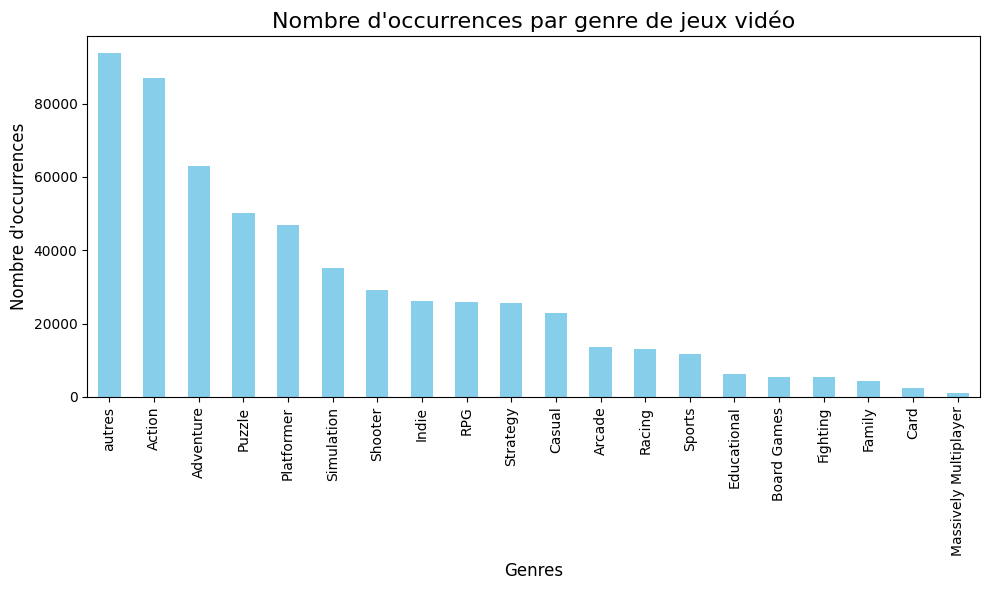

In [35]:
# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Créer l'histogramme en utilisant les genres et leurs occurrences
total_genres_count_2013.plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Nombre d\'occurrences par genre de jeux vidéo', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)

# Rotation des étiquettes de genres pour mieux les lire
plt.xticks(rotation=90)

# Afficher le graphique
plt.tight_layout()
plt.show()

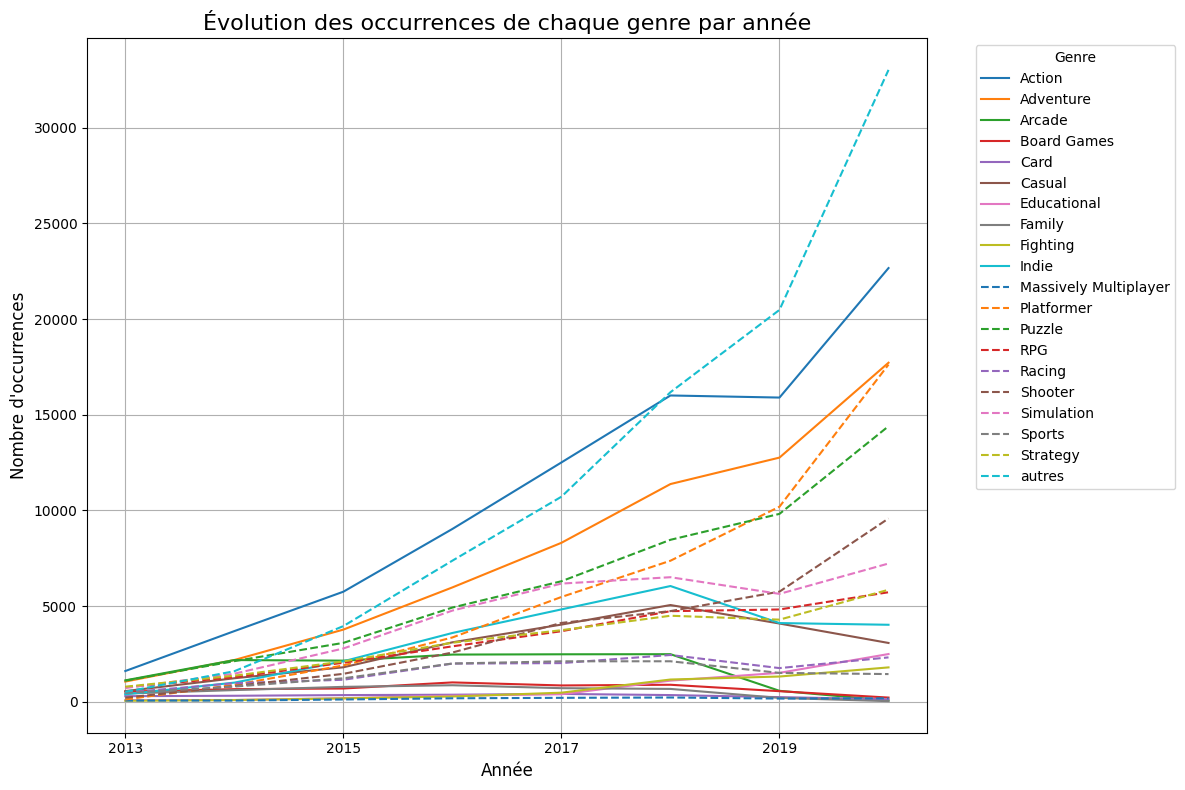

In [37]:
# Génération d'une liste de couleurs contrastées
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Styles de lignes alternés (continue et pointillé)
linestyles = ['-', '--']  # '-' pour ligne continue, '--' pour pointillé

# Exemple d'un DataFrame fictif (à remplacer par votre DataFrame)
# df_vgames_2013 = pd.read_csv("votre_fichier.csv") # Exemple de chargement de fichier

# Étape 1 : Concaténer toutes les colonnes 'genres1', 'genres2', etc., avec 'annee'
df_genres_concat_2013 = pd.melt(df_vgames_2013, id_vars=['Annee'], 
                                value_vars=['genres1', 'genres2', 'genres3', 'genres4', 'genres5', 
                                            'genres6', 'genres7', 'genres8', 'genres9', 'genres10', 'genres11'],
                                var_name='genre_col', value_name='genre')

# Retirer les valeurs nulles
df_genres_concat_2013 = df_genres_concat_2013.dropna(subset=['genre'])

# Étape 2 : Groupby sur 'Annee' et 'genre' pour compter les occurrences
occurrences_par_genre_2013 = df_genres_concat_2013.groupby(['Annee', 'genre']).size().unstack(fill_value=0)

# Étape 3 : Tracer le graphique en courbe
plt.figure(figsize=(12, 8))

# Tracer chaque genre avec une courbe différente
for i, genre in enumerate(occurrences_par_genre_2013.columns):
    color = colors[i % len(colors)]  # Sélectionne la couleur en cycle
    linestyle = linestyles[(i // len(colors)) % len(linestyles)]  # Alterne le style de ligne
    plt.plot(occurrences_par_genre_2013.index, occurrences_par_genre_2013[genre], 
             label=genre, color=color, linestyle=linestyle)

# Ajouter les labels et la légende
plt.title("Évolution des occurrences de chaque genre par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Ajuster les ticks pour l'axe des années (X) afin d'afficher uniquement les valeurs entières
plt.xticks(ticks=np.arange(occurrences_par_genre_2013.index.min(), occurrences_par_genre_2013.index.max()+1, 2))

# Afficher le graphique
plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()

In [38]:
# Étape 1 : Créer une série avec tous les genres et inclure ratings_count
genres_melted_2013 = df_vgames_2013.melt(id_vars=['rating', 'ratings_count'], 
                               value_vars=[f'genres{i}' for i in range(1, 12)], 
                               value_name='genre').dropna()

# Étape 2 : Exclure les genres vides et les lignes où ratings_count == 0
genres_melted_2013 = genres_melted_2013[(genres_melted_2013['genre'] != '') & (genres_melted_2013['ratings_count'] > 0)]

# Étape 3 : Calculer la moyenne des notes par genre en tenant compte uniquement des lignes valides
moyenne_notes_par_genre_2013 = genres_melted_2013.groupby('genre')['rating'].mean()

# Trier les genres par la note moyenne
moyenne_notes_par_genre_2013 = moyenne_notes_par_genre_2013.sort_values(ascending=False)

# Afficher les moyennes des notes par genre
print(moyenne_notes_par_genre_2013)

genre
Fighting                 1.923645
Shooter                  1.752729
Platformer               1.480368
Card                     1.381679
Massively Multiplayer    1.376804
Action                   1.223072
Puzzle                   1.112947
Adventure                1.108480
RPG                      1.079533
Strategy                 1.066792
Family                   1.066429
Sports                   1.055864
Racing                   1.038300
Indie                    1.032142
Arcade                   1.030231
Board Games              0.963655
Simulation               0.931220
Educational              0.813882
Casual                   0.730963
autres                   0.411679
Name: rating, dtype: float64


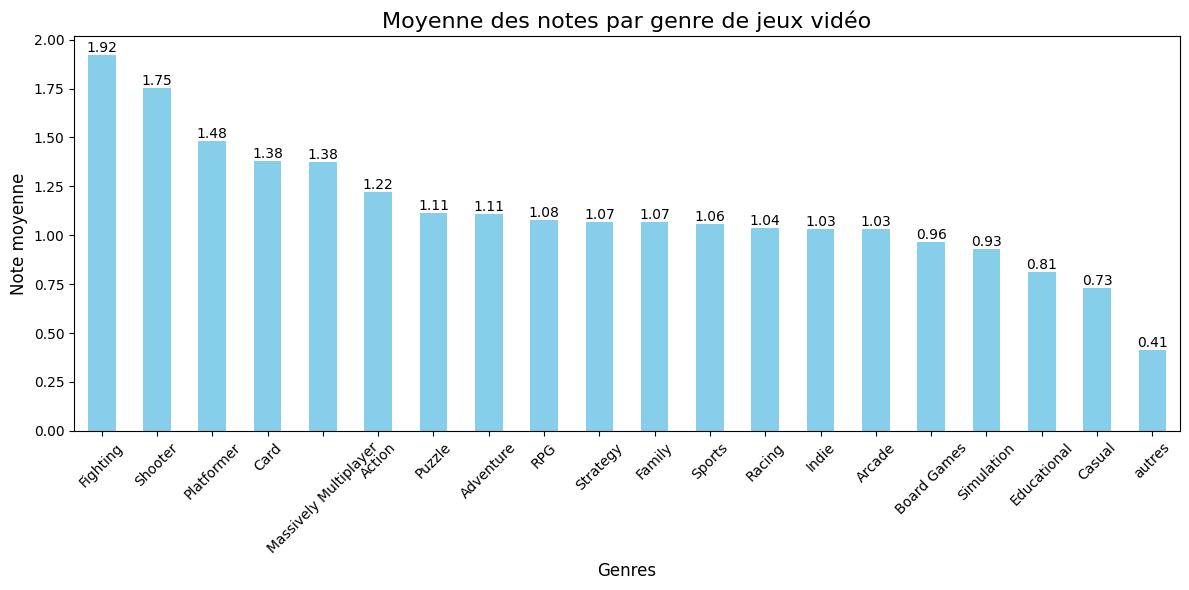

In [39]:
plt.figure(figsize=(12, 6))
moyenne_notes_par_genre_2013.plot(kind='bar', color='skyblue')

# Ajouter les labels et le titre
plt.title("Moyenne des notes par genre de jeux vidéo", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Note moyenne", fontsize=12)

# Afficher les valeurs sur les barres
for index, value in enumerate(moyenne_notes_par_genre_2013):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

# Ajuster la disposition
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [40]:
# Calculer le seuil pour les 10 % des plus hautes valeurs de 'suggestions_count'
top_10_suggestion = df_vgames_2013['suggestions_count'].quantile(0.90)

# Filtrer les lignes où 'suggestions_count' est supérieur ou égal au seuil
df_top_10_suggestion = df_vgames_2013[df_vgames_2013['suggestions_count'] >= top_10_suggestion]

# Afficher les premières lignes du DataFrame filtré
df_top_10_suggestion.head()

,id,slug,name,Annee,rating,rating_top,playtime,ratings_count,suggestions_count,game_series_count,...,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10,genres11
0,1,dgeneration-hd,D/Generation HD,2015,0.0,0.0,1,2,292,0,...,Puzzle,None,None,None,None,None,None,None,None,None
1,10,g-prime,G Prime Into The Rain,2016,0.0,0.0,0,3,389,0,...,Indie,None,None,None,None,None,None,None,None,None
3,1000,pixel-gear,Pixel Gear,2016,0.0,0.0,0,0,455,0,...,Indie,None,None,None,None,None,None,None,None,None
4,10000,gods-and-idols,Gods and Idols,2016,0.0,1.0,1,5,262,0,...,Strategy,Massively Multiplayer,None,None,None,None,None,None,None,None
10,100006,fading-light-descent,Fading Light: Descent,2017,0.0,0.0,0,0,279,0,...,None,None,None,None,None,None,None,None,None,None


In [41]:
df_top_10_suggestion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41106 entries, 0 to 437444
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41106 non-null  int64  
 1   slug                  41106 non-null  object 
 2   name                  41106 non-null  object 
 3   Annee                 41106 non-null  int64  
 4   rating                41106 non-null  float64
 5   rating_top            41106 non-null  float64
 6   playtime              41106 non-null  int32  
 7   ratings_count         41106 non-null  int32  
 8   suggestions_count     41106 non-null  int32  
 9   game_series_count     41106 non-null  int32  
 10  reviews_count         41106 non-null  int32  
 11  developers            40382 non-null  object 
 12  publishers            29373 non-null  object 
 13  esrb_rating           7972 non-null   object 
 14  added_status_yet      41106 non-null  float64
 15  added_status_owned    4

In [42]:
df_top_10_suggestion = df_top_10_suggestion.drop(columns=['genres11'])
# Réinitialiser l'index du DataFrame filtré
df_top_10_suggestion.reset_index(drop=True, inplace=True)

df_top_10_suggestion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 72 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    41106 non-null  int64  
 1   slug                  41106 non-null  object 
 2   name                  41106 non-null  object 
 3   Annee                 41106 non-null  int64  
 4   rating                41106 non-null  float64
 5   rating_top            41106 non-null  float64
 6   playtime              41106 non-null  int32  
 7   ratings_count         41106 non-null  int32  
 8   suggestions_count     41106 non-null  int32  
 9   game_series_count     41106 non-null  int32  
 10  reviews_count         41106 non-null  int32  
 11  developers            40382 non-null  object 
 12  publishers            29373 non-null  object 
 13  esrb_rating           7972 non-null   object 
 14  added_status_yet      41106 non-null  float64
 15  added_status_owned 

In [43]:
# Créer une liste des colonnes de genres que tu veux analyser
genres_columns_top = [col for col in df_top_10_suggestion.columns if col.startswith('genres')]

# Initialiser une série vide pour stocker les comptes des genres
total_genres_count_top = pd.Series(dtype=int)

# Compter les occurrences dans chaque colonne de genres et les additionner
for col in genres_columns_top:
    total_genres_count_top = total_genres_count_top.add(df_top_10_suggestion[col].value_counts(), fill_value=0)

# Convertir en entier (pour éviter les valeurs décimales après l'addition)
total_genres_count_top = total_genres_count_top.astype(int)

# Trier les genres par ordre décroissant
total_genres_count_top = total_genres_count_top.sort_values(ascending=False)

# Afficher le total des occurrences de chaque genre, trié par ordre décroissant
print(total_genres_count_top)

Action                   16068
Indie                    14597
Adventure                14268
Casual                    7722
RPG                       7289
Simulation                6596
Strategy                  6241
autres                    2778
Puzzle                    2655
Shooter                   2287
Sports                    1931
Racing                    1822
Platformer                1751
Arcade                    1538
Massively Multiplayer      897
Fighting                   518
Board Games                328
Educational                275
Card                       239
Family                     232
dtype: int32


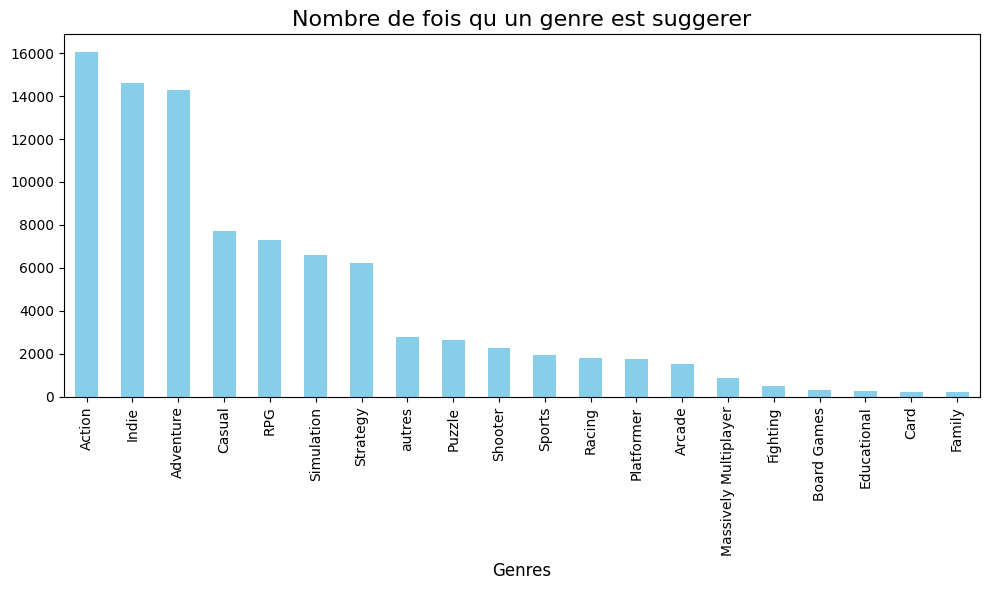

In [44]:
# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Créer l'histogramme en utilisant les genres et leurs occurrences
total_genres_count_top.plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Nombre de fois qu un genre est suggerer', fontsize=16)
plt.xlabel('Genres', fontsize=12)

# Rotation des étiquettes de genres pour mieux les lire
plt.xticks(rotation=90)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [45]:
# Créer une liste des colonnes de genres que vous voulez analyser
genres_columns_top = [col for col in df_top_10_suggestion.columns if col.startswith('genres')]

# Initialiser une série vide pour stocker la somme de suggestions_count par genre
total_genres_sum_top = pd.Series(dtype=float)

# Calculer la somme de suggestions_count pour chaque genre
for col in genres_columns_top:
    # Groupby sur chaque genre et addition des suggestions_count, puis ajout au total
    genre_sums = df_top_10_suggestion.groupby(col)['suggestions_count'].sum()
    total_genres_sum_top = total_genres_sum_top.add(genre_sums, fill_value=0)

# Convertir en entier
total_genres_sum_top = total_genres_sum_top.astype(int)

# Trier les genres par ordre décroissant
total_genres_sum_top = total_genres_sum_top.sort_values(ascending=False)

# Afficher la somme des suggestions_count pour chaque genre
print("Somme des suggestions par genre:")
print(total_genres_sum_top)

Somme des suggestions par genre:
Action                   5415651
Indie                    4926112
Adventure                4747928
RPG                      2470347
Casual                   2465309
Strategy                 2053325
Simulation               2036642
autres                    824126
Puzzle                    777060
Shooter                   753490
Sports                    570643
Racing                    535795
Platformer                498508
Arcade                    463759
Massively Multiplayer     355649
Fighting                  176795
Board Games                89805
Educational                77921
Card                       68011
Family                     67067
dtype: int32


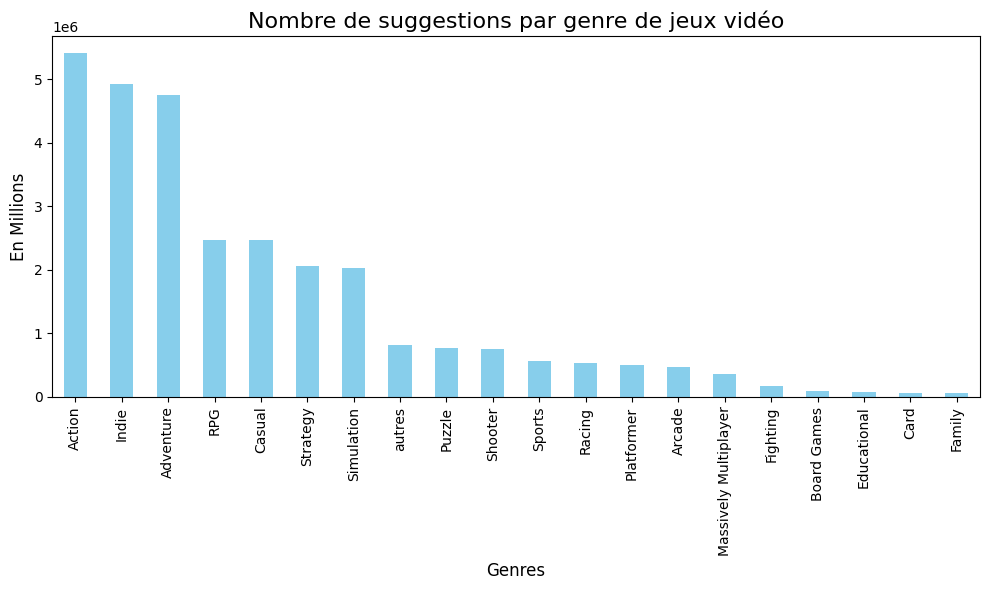

In [46]:
# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Créer l'histogramme en utilisant les genres et leurs occurrences
total_genres_sum_top.plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Nombre de suggestions par genre de jeux vidéo', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('En Millions', fontsize=12)

# Rotation des étiquettes de genres pour mieux les lire
plt.xticks(rotation=90)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [47]:
# Créer une liste des colonnes de genres que vous voulez analyser
genres_columns_top = [col for col in df_top_10_suggestion.columns if col.startswith('genres')]

# Initialiser deux séries pour stocker la somme et le nombre d'occurrences par genre
sum_genres_count = pd.Series(dtype=float)
count_genres = pd.Series(dtype=int)

# Calculer la somme et le nombre d'occurrences pour chaque genre
for col in genres_columns_top:
    # Somme des suggestions_count pour chaque genre
    genre_sums = df_top_10_suggestion.groupby(col)['suggestions_count'].sum()
    sum_genres_count = sum_genres_count.add(genre_sums, fill_value=0)
    
    # Nombre d'occurrences pour chaque genre
    genre_counts = df_top_10_suggestion[col].value_counts()
    count_genres = count_genres.add(genre_counts, fill_value=0)

# Calculer la moyenne en divisant la somme par le nombre d'occurrences
average_genres_count = sum_genres_count / count_genres

# Trier les genres par ordre décroissant pour plus de lisibilité
average_genres_count = average_genres_count.sort_values(ascending=False)

# Afficher la moyenne des suggestions_count pour chaque genre
print("Moyenne des suggestions_count par genre :")
print(average_genres_count)

Moyenne des suggestions_count par genre :
Massively Multiplayer    396.487179
Fighting                 341.303089
RPG                      338.914392
Indie                    337.474276
Action                   337.045743
Adventure                332.767592
Shooter                  329.466550
Strategy                 329.005768
Casual                   319.257835
Simulation               308.769254
Arcade                   301.533810
autres                   296.661627
Sports                   295.516831
Racing                   294.069704
Puzzle                   292.677966
Family                   289.081897
Platformer               284.699029
Card                     284.564854
Educational              283.349091
Board Games              273.795732
dtype: float64


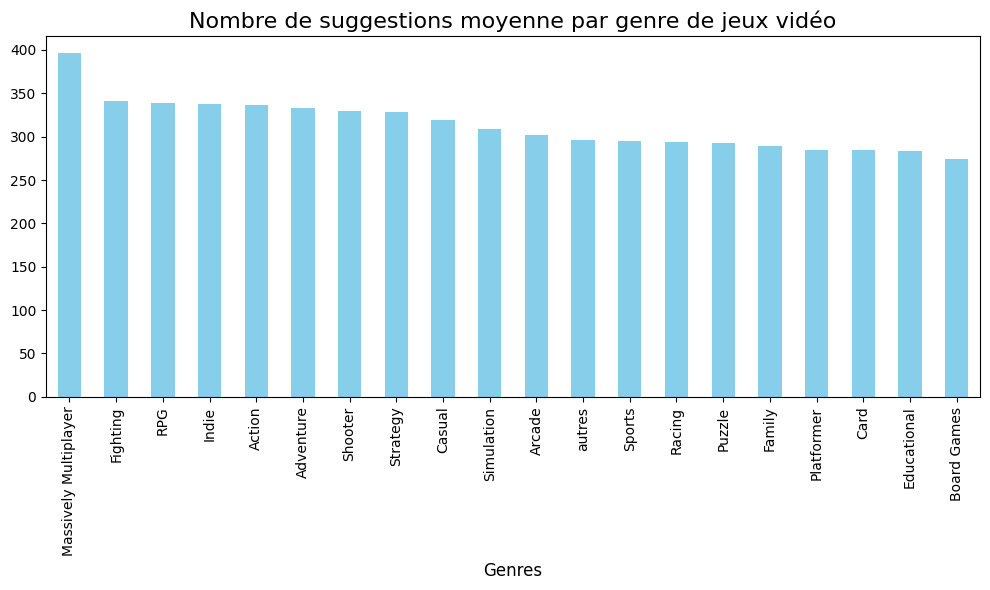

In [48]:
# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Créer l'histogramme en utilisant les genres et leurs occurrences
average_genres_count.plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Nombre de suggestions moyenne par genre de jeux vidéo', fontsize=16)
plt.xlabel('Genres', fontsize=12)

# Rotation des étiquettes de genres pour mieux les lire
plt.xticks(rotation=90)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [49]:
# Étape 1 : Créer une série avec tous les genres et inclure ratings_count
genres_melted_top = df_top_10_suggestion.melt(id_vars=['rating', 'ratings_count'], 
                               value_vars=[f'genres{i}' for i in range(1, 11)], 
                               value_name='genre').dropna()

# Étape 2 : Exclure les genres vides et les lignes où ratings_count == 0
genres_melted_top = genres_melted_top[(genres_melted_top['genre'] != '') & (genres_melted_top['ratings_count'] > 0)]

# Étape 3 : Calculer la moyenne des notes par genre en tenant compte uniquement des lignes valides
moyenne_notes_par_genre_top = genres_melted_top.groupby('genre')['rating'].mean()

# Trier les genres par la note moyenne
moyenne_notes_par_genre_top = moyenne_notes_par_genre_top.sort_values(ascending=False)

# Afficher les moyennes des notes par genre
print(moyenne_notes_par_genre_top)

genre
Platformer               2.362362
Fighting                 2.324423
Shooter                  2.155539
Puzzle                   1.695265
Card                     1.654375
Family                   1.652941
Arcade                   1.531214
Massively Multiplayer    1.461684
Action                   1.442461
Board Games              1.413261
RPG                      1.333236
Racing                   1.321441
Adventure                1.316033
Strategy                 1.244749
Sports                   1.214221
Indie                    1.194343
Simulation               1.155399
Educational              1.065385
Casual                   0.877555
autres                   0.673394
Name: rating, dtype: float64


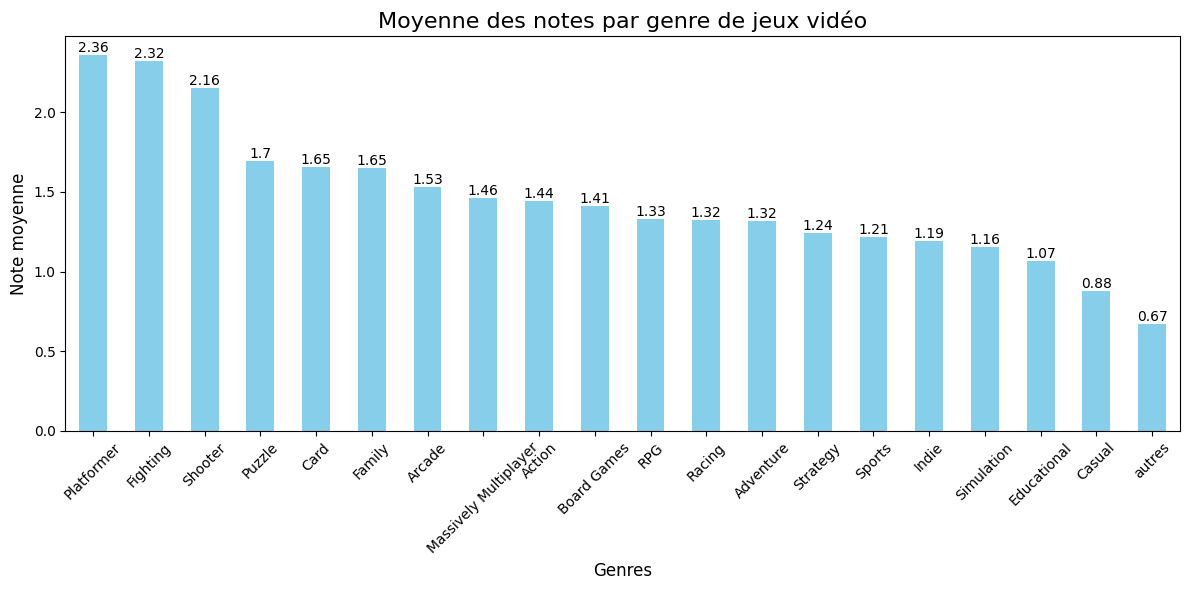

In [50]:
plt.figure(figsize=(12, 6))
moyenne_notes_par_genre_top.plot(kind='bar', color='skyblue')

# Ajouter les labels et le titre
plt.title("Moyenne des notes par genre de jeux vidéo", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Note moyenne", fontsize=12)

# Afficher les valeurs sur les barres
for index, value in enumerate(moyenne_notes_par_genre_top):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

# Ajuster la disposition
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

In [51]:
# Étape 1 : Transformer les colonnes de genres en une seule colonne avec melt()
genres_melted = df_vgames_2013.melt(id_vars=['suggestions_count'], 
                                         value_vars=[f'genres{i}' for i in range(1, 12)], 
                                         value_name='genre').dropna()

# Étape 2 : Exclure les genres vides
genres_melted = genres_melted[genres_melted['genre'] != '']

# Étape 3 : Calculer la moyenne des suggestions par genre
moyenne_suggestions_par_genre = genres_melted.groupby('genre')['suggestions_count'].mean()

# Étape 4 : Trier par ordre décroissant des moyennes
moyenne_suggestions_par_genre = moyenne_suggestions_par_genre.sort_values(ascending=False)

# Afficher les résultats
print(moyenne_suggestions_par_genre)

genre
Massively Multiplayer    329.997412
Indie                    238.318888
Casual                   167.690985
RPG                      150.321598
Strategy                 130.188259
Adventure                127.244649
Simulation               115.548021
Sports                   112.310968
Action                   111.043748
Racing                   107.813330
Card                      98.647718
Arcade                    94.687444
Family                    80.316000
Fighting                  80.272916
Board Games               77.796904
Shooter                   69.690120
Puzzle                    61.869086
Educational               55.358027
Platformer                51.774299
autres                    42.697012
Name: suggestions_count, dtype: float64


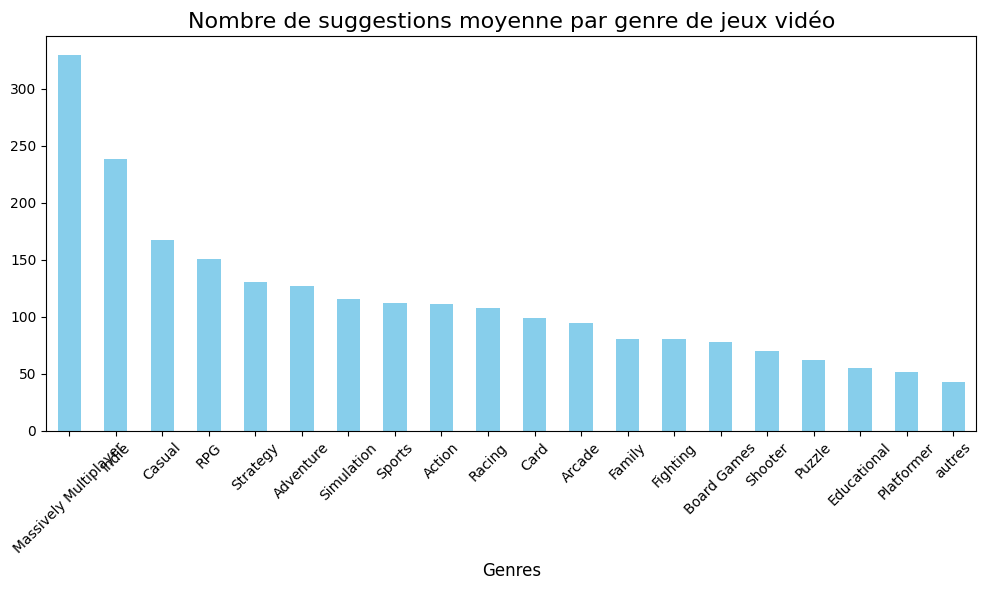

In [52]:
# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Créer l'histogramme en utilisant les genres et leurs occurrences
moyenne_suggestions_par_genre.plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Nombre de suggestions moyenne par genre de jeux vidéo', fontsize=16)
plt.xlabel('Genres', fontsize=12)

# Rotation des étiquettes de genres pour mieux les lire
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

### Analyses sur les consoles actuellement en ventes

In [53]:
# Liste des plateformes que vous souhaitez conserver
platforms_actuel = ["PlayStation 4", "Xbox One","PlayStation 5","Nintendo Switch","Xbox Series S/X"]

# Filtrer les lignes où 'platforms' contient l'une des valeurs de platforms_to_keep
df_platforms = df_vgames_2013[df_vgames_2013['platforms'].str.contains('|'.join(platforms_actuel), na=False)]

# Afficher les premières lignes pour vérifier
df_platforms.head()

,id,slug,name,Annee,rating,rating_top,playtime,ratings_count,suggestions_count,game_series_count,...,genres2,genres3,genres4,genres5,genres6,genres7,genres8,genres9,genres10,genres11
0,1,dgeneration-hd,D/Generation HD,2015,0.00,0.0,1,2,292,0,...,Puzzle,None,None,None,None,None,None,None,None,None
1,10,g-prime,G Prime Into The Rain,2016,0.00,0.0,0,3,389,0,...,Indie,None,None,None,None,None,None,None,None,None
3,1000,pixel-gear,Pixel Gear,2016,0.00,0.0,0,0,455,0,...,Indie,None,None,None,None,None,None,None,None,None
43,10004,mages-of-mystralia,Mages of Mystralia,2017,3.25,5.0,3,16,438,0,...,Adventure,Indie,None,None,None,None,None,None,None,None
53,10005,seum-speedrunners-from-hell,SEUM: Speedrunners from Hell,2016,3.74,4.0,4,34,514,0,...,Shooter,Adventure,Arcade,Indie,None,None,None,None,None,None


In [54]:
df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7229 entries, 0 to 437397
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7229 non-null   int64  
 1   slug                  7229 non-null   object 
 2   name                  7229 non-null   object 
 3   Annee                 7229 non-null   int64  
 4   rating                7229 non-null   float64
 5   rating_top            7229 non-null   float64
 6   playtime              7229 non-null   int32  
 7   ratings_count         7229 non-null   int32  
 8   suggestions_count     7229 non-null   int32  
 9   game_series_count     7229 non-null   int32  
 10  reviews_count         7229 non-null   int32  
 11  developers            6300 non-null   object 
 12  publishers            5947 non-null   object 
 13  esrb_rating           3882 non-null   object 
 14  added_status_yet      7229 non-null   float64
 15  added_status_owned    72

In [55]:
# Supprimer les colonnes non necessaire
df_platforms = df_platforms.drop(df_platforms.columns[[21,22,23,24,25,27,28,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,57,58,59,60,61,71,72]], axis=1)

df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7229 entries, 0 to 437397
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7229 non-null   int64  
 1   slug                  7229 non-null   object 
 2   name                  7229 non-null   object 
 3   Annee                 7229 non-null   int64  
 4   rating                7229 non-null   float64
 5   rating_top            7229 non-null   float64
 6   playtime              7229 non-null   int32  
 7   ratings_count         7229 non-null   int32  
 8   suggestions_count     7229 non-null   int32  
 9   game_series_count     7229 non-null   int32  
 10  reviews_count         7229 non-null   int32  
 11  developers            6300 non-null   object 
 12  publishers            5947 non-null   object 
 13  esrb_rating           3882 non-null   object 
 14  added_status_yet      7229 non-null   float64
 15  added_status_owned    72

In [56]:
# Réinitialiser l'index du DataFrame filtré
df_platforms.reset_index(drop=True, inplace=True)
df_platforms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7229 entries, 0 to 7228
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7229 non-null   int64  
 1   slug                  7229 non-null   object 
 2   name                  7229 non-null   object 
 3   Annee                 7229 non-null   int64  
 4   rating                7229 non-null   float64
 5   rating_top            7229 non-null   float64
 6   playtime              7229 non-null   int32  
 7   ratings_count         7229 non-null   int32  
 8   suggestions_count     7229 non-null   int32  
 9   game_series_count     7229 non-null   int32  
 10  reviews_count         7229 non-null   int32  
 11  developers            6300 non-null   object 
 12  publishers            5947 non-null   object 
 13  esrb_rating           3882 non-null   object 
 14  added_status_yet      7229 non-null   float64
 15  added_status_owned   

In [57]:
# Créer une liste des colonnes de genres que tu veux analyser
genres_columns_platforms = [col for col in df_platforms.columns if col.startswith('genres')]

# Initialiser une série vide pour stocker les comptes des genres
total_genres_count_platforms = pd.Series(dtype=int)

# Compter les occurrences dans chaque colonne de genres et les additionner
for col in genres_columns_platforms:
    total_genres_count_platforms = total_genres_count_platforms.add(df_platforms[col].value_counts(), fill_value=0)

# Convertir en entier (pour éviter les valeurs décimales après l'addition)
total_genres_count_platforms = total_genres_count_platforms.astype(int)

# Trier les genres par ordre décroissant
total_genres_count_platforms = total_genres_count_platforms.sort_values(ascending=False)

# Afficher le total des occurrences de chaque genre, trié par ordre décroissant
print(total_genres_count_platforms)

Action                   3172
Indie                    2600
Adventure                2180
autres                   1409
Casual                   1058
RPG                      1007
Simulation                762
Strategy                  691
Puzzle                    490
Sports                    486
Shooter                   469
Arcade                    451
Racing                    318
Platformer                213
Fighting                  167
Family                    102
Massively Multiplayer      81
Board Games                43
Educational                30
Card                       25
dtype: int32


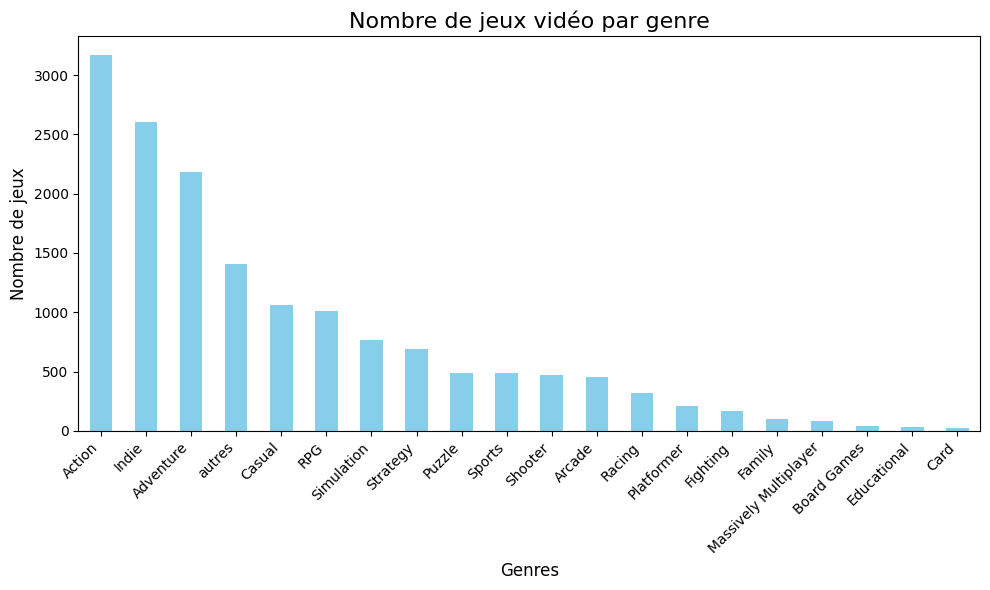

In [58]:
# Créer une figure et des axes
plt.figure(figsize=(10, 6))

# Créer l'histogramme en utilisant les genres et leurs occurrences
total_genres_count_platforms.plot(kind='bar', color='skyblue')

# Ajouter un titre et des labels
plt.title('Nombre de jeux vidéo par genre', fontsize=16)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Nombre de jeux', fontsize=12)

# Rotation des étiquettes de genres pour mieux les lire
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()

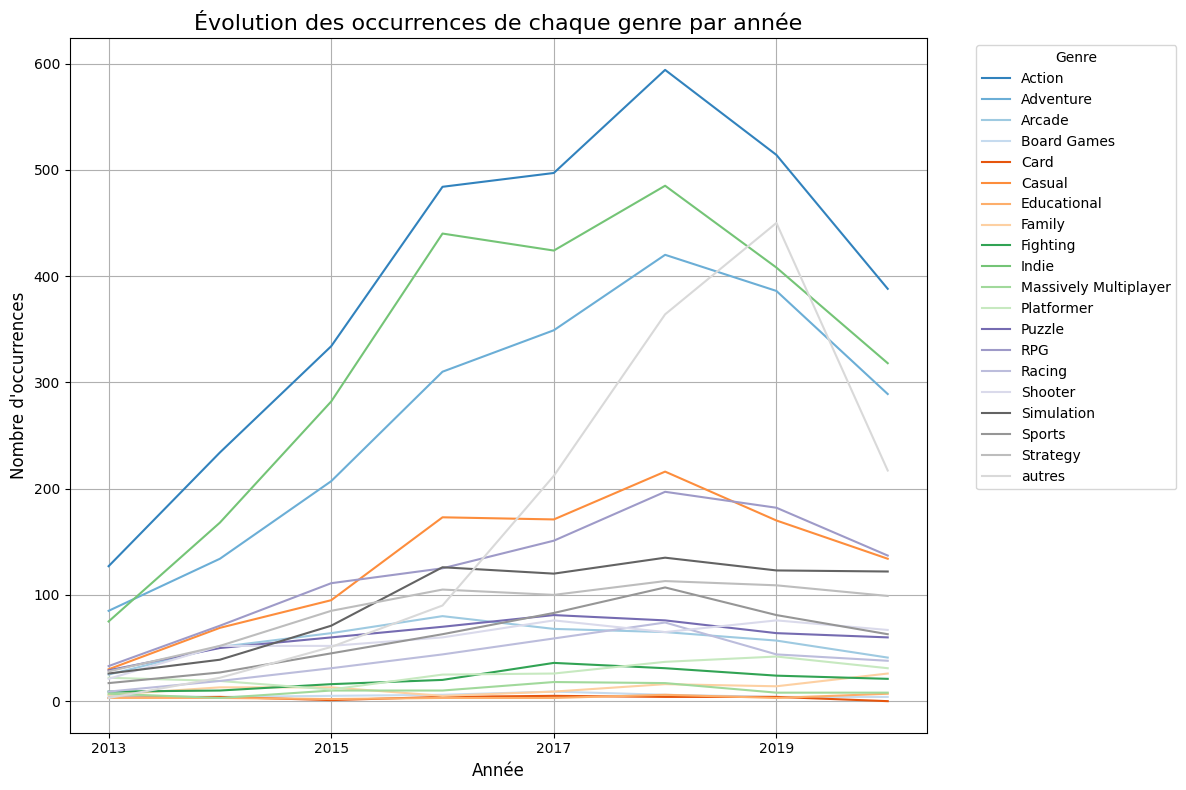

In [59]:
# Étape 1 : Concaténer toutes les colonnes 'genres1', 'genres2', etc., avec 'annee'
df_genres_concat_platforms = pd.melt(df_platforms, id_vars=['Annee'], value_vars=['genres1', 'genres2', 'genres3', 'genres4', 'genres5', 
                                                                     'genres6', 'genres7', 'genres8', 'genres9'],
                           var_name='genre_col', value_name='genre')

# Retirer les valeurs nulles (celles qui n'ont pas de genre pour une colonne donnée)
df_genres_concat_platforms = df_genres_concat_platforms.dropna(subset=['genre'])

# Étape 2 : Groupby sur 'annee' et 'genre' pour compter les occurrences
occurrences_par_genre_platforms = df_genres_concat_platforms.groupby(['Annee', 'genre']).size().unstack(fill_value=0)

# Étape 3 : Tracer le graphique en courbe
plt.figure(figsize=(12, 8))

# Couleurs pour les genres (tab20c fournit une large gamme de couleurs)
colors = plt.cm.tab20c.colors

# Tracer chaque genre avec une courbe différente
for i, genre in enumerate(occurrences_par_genre_platforms.columns):
    plt.plot(occurrences_par_genre_platforms.index, occurrences_par_genre_platforms[genre], label=genre, color=colors[i % len(colors)])

# Ajouter les labels et la légende
plt.title("Évolution des occurrences de chaque genre par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Ajuster les ticks pour l'axe des années (X) afin d'afficher uniquement les valeurs entières
plt.xticks(ticks=np.arange(occurrences_par_genre_platforms.index.min(), occurrences_par_genre_platforms.index.max()+1, 2))

# Afficher le graphique
plt.tight_layout()  # Ajuster l'espacement pour éviter les chevauchements
plt.show()

In [60]:
# Étape 1 : Créer une série avec tous les genres et inclure ratings_count
genres_melted_platforms = df_platforms.melt(id_vars=['rating', 'ratings_count'], 
                               value_vars=[f'genres{i}' for i in range(1, 9)], 
                               value_name='genre').dropna()

# Étape 2 : Exclure les genres vides et les lignes où ratings_count == 0
genres_melted_platforms = genres_melted_platforms[(genres_melted_platforms['genre'] != '') & (genres_melted_platforms['ratings_count'] > 0)]

# Étape 3 : Calculer la moyenne des notes par genre en tenant compte uniquement des lignes valides
moyenne_notes_par_genre_platforms = genres_melted_platforms.groupby('genre')['rating'].mean()

# Trier les genres par la note moyenne
moyenne_notes_par_genre_platforms = moyenne_notes_par_genre_platforms.sort_values(ascending=False)

# Afficher les moyennes des notes par genre
print(moyenne_notes_par_genre_platforms)

genre
Platformer               2.902553
Massively Multiplayer    2.846164
Card                     2.796316
Educational              2.505000
Shooter                  2.479667
Family                   2.407143
Fighting                 2.312605
Adventure                2.303976
RPG                      2.270677
Action                   2.253678
Puzzle                   2.205227
Simulation               2.111634
Strategy                 2.076811
Racing                   2.067534
Indie                    2.032725
Arcade                   1.953936
Sports                   1.866867
Board Games              1.856667
Casual                   1.681406
autres                   0.586958
Name: rating, dtype: float64


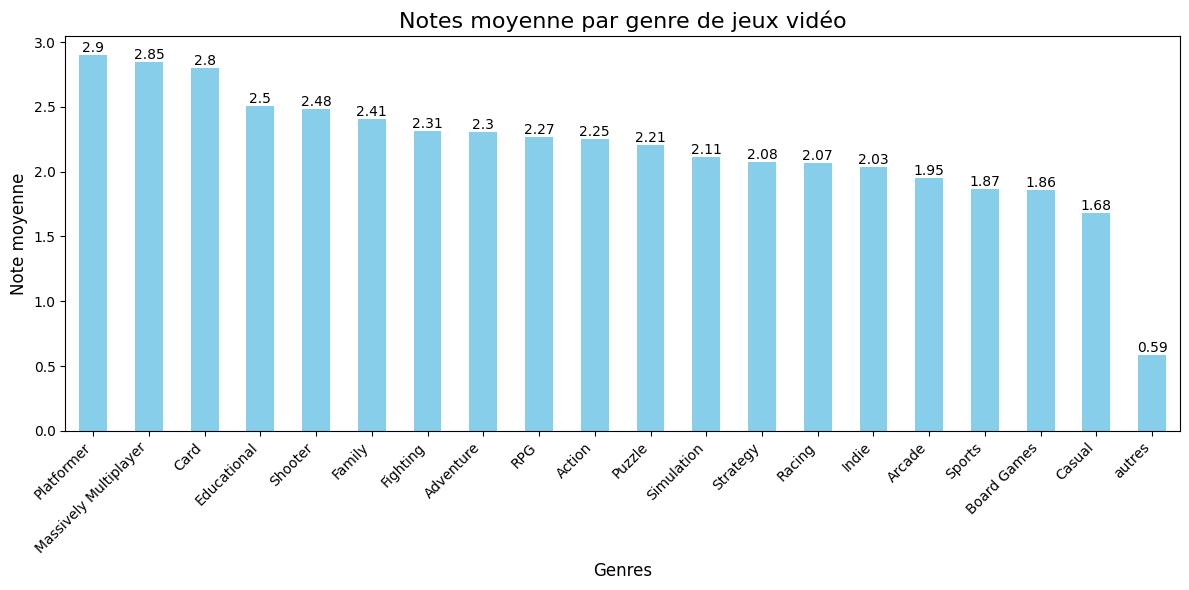

In [61]:
plt.figure(figsize=(12, 6))
moyenne_notes_par_genre_platforms.plot(kind='bar', color='skyblue')

# Ajouter les labels et le titre
plt.title("Notes moyenne par genre de jeux vidéo", fontsize=16)
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Note moyenne", fontsize=12)

# Afficher les valeurs sur les barres
for index, value in enumerate(moyenne_notes_par_genre_platforms):
    plt.text(index, value, round(value, 2), ha='center', va='bottom')

# Ajuster la disposition
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le graphique
plt.show()

In [62]:
# Étape 1 : Fusionner les colonnes de genres en une seule colonne
genres_melted_platforms = df_platforms.melt(id_vars=['suggestions_count'], 
                                          value_vars=[f'genres{i}' for i in range(1, 9)], 
                                          value_name='genre').dropna()

# Étape 2 : Filtrer les genres non nuls
genres_melted_platforms = genres_melted_platforms[genres_melted_platforms['genre'] != '']

# Étape 3 : Calculer la moyenne des suggestions par genre
moyenne_suggestions_platforms = genres_melted_platforms.groupby('genre')['suggestions_count'].mean()

# Afficher les résultats triés du plus élevé au plus faible
moyenne_suggestions_platforms = moyenne_suggestions_platforms.sort_values(ascending=False)
print(moyenne_suggestions_platforms)

genre
Massively Multiplayer    449.049383
Shooter                  399.842217
RPG                      380.216485
Fighting                 366.065868
Action                   359.832913
Adventure                357.288991
Strategy                 334.138929
Platformer               333.685446
Indie                    325.370912
Card                     311.440000
Racing                   309.814465
Simulation               301.716535
Casual                   275.216446
Sports                   274.932099
Arcade                   273.913525
Puzzle                   266.465306
Family                   246.117647
Board Games              237.511628
autres                   214.941093
Educational              201.500000
Name: suggestions_count, dtype: float64


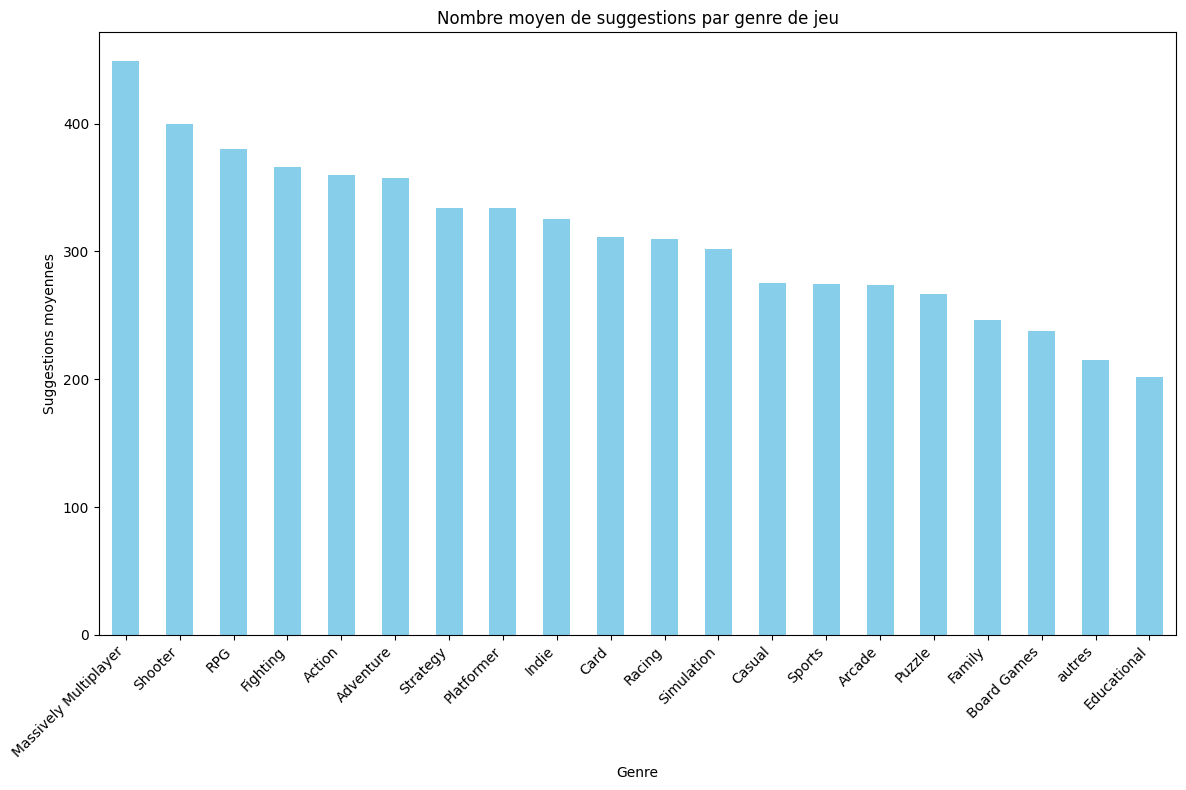

In [63]:
# Tracer l'histogramme de la moyenne des suggestions par genre
plt.figure(figsize=(12, 8))
moyenne_suggestions_platforms.plot(kind='bar', color='skyblue')

# Ajouter des labels et un titre
plt.title("Nombre moyen de suggestions par genre de jeu")
plt.xlabel("Genre")
plt.ylabel("Suggestions moyennes")
plt.xticks(rotation=45, ha='right')  # Rotation des noms de genres pour lisibilité

# Afficher le graphique
plt.tight_layout()  # Ajustement pour éviter le chevauchement des éléments
plt.show()

In [66]:
# Filtrer dynamiquement pour inclure uniquement les colonnes contenant 'genre'
genre_columns = [col for col in df_vgames_2013.columns if 'genre' in col]

# Appliquer le filtre pour obtenir les jeux Puzzle
puzzle_games = df_vgames_2013[(df_vgames_2013[genre_columns] == 'Puzzle').any(axis=1)]

# Vérifier le nombre de jeux filtrés
print(f"Nombre de jeux de genre Puzzle : {len(puzzle_games)}")

# Étape suivante : Calculer la présence des jeux Puzzle par plateforme
platform_columns = df_vgames_2013.columns[21:62]
platform_counts_puzzle = puzzle_games[platform_columns].sum().sort_values(ascending=False)

# Afficher les plateformes par ordre décroissant
print("Plateformes les plus représentatives pour le genre Puzzle :\n", platform_counts_puzzle)

Nombre de jeux de genre Puzzle : 50178
Plateformes les plus représentatives pour le genre Puzzle :
 PC                    26448.0
Web                   13677.0
iOS                   11947.0
macOS                  6926.0
Linux                  4848.0
Android                3549.0
PlayStation             344.0
PlayStation 4           326.0
Nintendo Switch         312.0
Xbox                    233.0
Xbox One                228.0
PS Vita                  97.0
Nintendo 3DS             41.0
Wii                      41.0
Wii U                    41.0
PlayStation 3            37.0
Xbox 36                  15.0
Classic Macintosh        11.0
PSP                       4.0
Xbox Series S/X           3.0
PlayStation 5             2.0
NES                       1.0
SNES                      1.0
Dreamcast                 0.0
Commodore / Amiga         0.0
Atari 26                  0.0
Atari ST                  0.0
Atari 78                  0.0
Apple II                  0.0
Game Boy Color            0.0


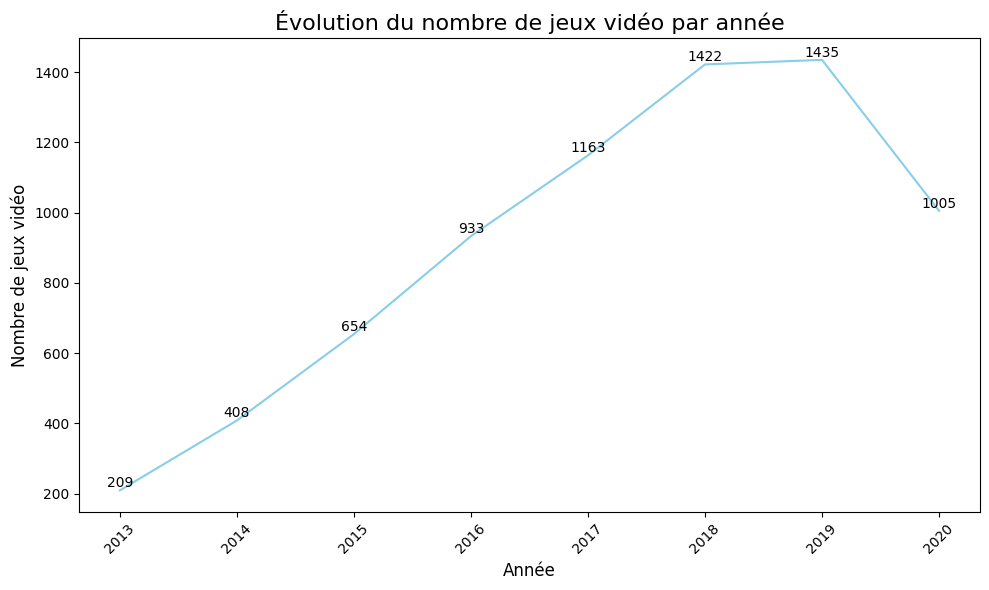

In [68]:
# Étape 1 : Grouper les jeux par année et compter le nombre de jeux par an
nb_jeux_annee = df_platforms.groupby('Annee').size()

# Étape 2 : Tracer le graphique en courbes
plt.figure(figsize=(10, 6))

# Tracer la courbe sans points
plt.plot(nb_jeux_annee.index, nb_jeux_annee.values, linestyle='-', color='skyblue')

# Ajouter les valeurs (nombre de jeux vidéo) sur chaque année
for x, y in zip(nb_jeux_annee.index, nb_jeux_annee.values):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')

# Ajouter les labels et le titre
plt.title("Évolution du nombre de jeux vidéo par année", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de jeux vidéo", fontsize=12)

# Afficher les années en entiers sur l'axe X
plt.xticks(ticks=np.arange(nb_jeux_annee.index.min(), nb_jeux_annee.index.max() + 1, 1), rotation=45)



# Afficher le graphique
plt.tight_layout()
plt.show()